Problem Statement : Prediction of credit card transactions labeled as fraudulent or Normal

# Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers 
are not charged for items that they did not purchase.

# Fraud Detection
In this notebook, we will attempt to build an algorithm able to detect a fraudulent transaction using a training dataset. 
We will exlain the thinking process at every step usine LIME (Local Interpretable Model-agnostic Explanations) principles making it accessible and user-friendly.

In [1]:
# ## here is several pagkages to import

import pandas as pd     
import numpy as np      # numpy is used for making arrays
 

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
## Lets read the file

In [4]:
creditcard = pd.read_csv(r"D:\Capstone_P1\creditcard.csv")     ## loading the dataset to paandas Dataframe

In [5]:
creditcard.head() # shows 1st five rows of data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# 1st column is nothing but time so this is first transaction & this time is present in sec
# we have column like v1,v2,....,v28
# second last column gives amount of credit card transaction which is in US dollar
# last column shows either transaction is normal or fradulant

In [7]:
## Time is in seconds
## In class label shows 0 and 1
# label 0 : represents normal transaction
# label 1 :- fraudulant transaction

In [8]:
# Describing all the data
creditcard.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,9.289524e-16,-1.803266e-15,1.674888e-15,1.475621e-15,3.501098e-15,1.392460e-15,-7.466538e-16,4.258754e-16,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
## Information about data
creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
creditcard.shape

(284807, 31)

In [11]:
## Lets check no of missing values in data set
creditcard.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
## so here we havent a missing values

In [13]:
# lets check the distribution of normal and fraudulant transction
creditcard.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

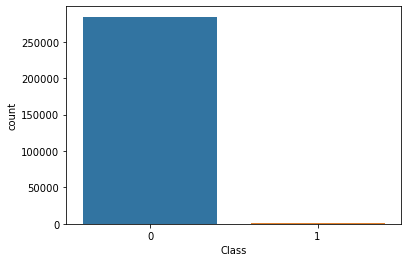

In [14]:
import seaborn as sns
plot = sns.countplot(x="Class", data=creditcard)

In [15]:
# here we see that in normal transaction we have 284315 tranasaction and in fradulent we have 492 transaction we had unbalanced data
#her have two target variable and in this we have more than 99% of data is in 1 particular class
# so this data is highly unbalanced

In [16]:
## here we can see presents points are:
# 0 : normal transaction
# 1 : fraudulent transaction
## it shows data set is highly unbalanced i.e more than 99% of data is in one particular class

In [17]:
## Lets separate the data for analysis 
normal = creditcard[creditcard.Class == 0]
fraulent = creditcard[creditcard.Class == 1]

In [18]:
## lets check transaction in each
normal.shape

(284315, 31)

In [19]:
fraulent.shape

(492, 31)

In [20]:
normal.Amount.describe()  # it shows staistical data of normal amount transaction

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [21]:
fraulent.Amount.describe()    # it shows statistical of fraud amount transaction

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [22]:
# from above description shows mean of fraudulent transaction is greater than mean of normal trasction

In [23]:
# comparing the values for both Normal and Fraud transactions
creditcard.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [24]:
# here we see the wide difference between mean of normal and fradulent tranction

In [25]:
## next step is dealing with unbalanced data so here we have more than 2 lakhs of data in one class which is normal transaction
# and only transaction present in fraudulent transaction so we are going to use undersampling 

# Undersampling

In [26]:
## Build a sample dataset containing silmilar distribution of normal transactions and fraudulant transaction
## so here no of fradulent transaction is 492

In [27]:
normal_sample = normal.sample(n=492)   ## it will give normal sample

In [28]:
# concatening two dataframes  ## count sampling

In [29]:
new_creditcard = pd.concat([normal_sample, fraulent],axis=0)     # axis=0 for rows

In [30]:
new_creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
221085,142428.0,-0.669955,1.444000,-1.073518,-1.421954,1.650894,-1.309833,2.185679,-0.981827,0.445184,0.957369,-1.147710,0.005106,0.792223,-0.186993,-0.106833,-0.721814,-0.975059,-0.373935,0.066329,0.480270,0.014606,0.852074,-0.398952,-0.642644,-0.080827,0.074115,0.245671,0.065740,23.45,0
56850,47633.0,-0.942061,0.416285,1.799223,1.294804,0.344039,0.400552,0.585573,0.247803,-0.800236,-0.286577,1.066106,0.668463,-0.450158,0.300224,-0.344431,-1.003267,0.444368,-0.112359,1.102642,0.284932,0.078855,0.168437,-0.093932,0.030962,0.458986,-0.150848,0.062762,0.074308,85.00,0
44085,41788.0,-4.492750,2.599386,-3.521625,1.207498,-2.556267,-0.995580,-1.191289,2.863715,-0.294014,0.385140,-1.435130,0.400048,-1.101907,2.659224,1.030035,0.113813,1.325186,-0.219190,-0.212744,-0.163746,0.195001,0.238641,-0.115962,0.082066,-0.495083,-0.364781,0.323775,-0.031491,99.99,0
221512,142592.0,-1.419934,-2.609222,-1.240783,0.827298,4.340167,-2.893997,-0.610218,-0.346333,0.271905,0.351601,-1.431944,-0.228102,-0.581647,0.698074,-0.007236,-1.357614,-0.056613,0.014608,1.147648,0.769125,0.572423,1.097871,0.649664,0.505160,-1.334591,-0.296387,0.073463,0.193434,19.67,0
111371,72206.0,-0.897326,0.122986,1.751544,-1.101910,-0.004945,-0.166936,0.219042,0.117637,-1.458811,0.127437,0.970677,0.777745,0.092502,-0.139576,-1.611277,-1.867050,0.127018,0.677862,-1.336277,-0.595697,-0.332685,-0.430892,-0.159416,0.222949,0.047277,0.195342,-0.066041,0.095978,10.00,0


In [31]:
new_creditcard.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,-0.888722,0.491140,0.728903,0.380428,-1.948883,-0.832498,0.519436,0.903562,1.197315,0.593509,-0.017652,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [32]:
new_creditcard['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [33]:
new_creditcard.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,98169.577236,-0.070973,-0.064687,-0.043322,0.079109,0.074559,0.073038,0.159003,-0.022551,0.006994,-0.026502,0.048061,0.005009,0.015638,0.030052,-0.022866,-0.079422,0.073510,-0.049740,0.047036,0.015661,-0.021570,-0.020991,-0.028483,-0.041721,-0.007527,-0.057885,0.005379,-0.022653,100.498211
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [34]:
## splitting the data into features and target

In [35]:
X = new_creditcard.drop(columns='Class',axis=1)                # axis=1 is for column
Y = new_creditcard['Class']

In [36]:
print(X)

            Time         V1         V2         V3         V4         V5  \
221085  142428.0  -0.669955   1.444000  -1.073518  -1.421954   1.650894   
56850    47633.0  -0.942061   0.416285   1.799223   1.294804   0.344039   
44085    41788.0  -4.492750   2.599386  -3.521625   1.207498  -2.556267   
221512  142592.0  -1.419934  -2.609222  -1.240783   0.827298   4.340167   
111371   72206.0  -0.897326   0.122986   1.751544  -1.101910  -0.004945   
229781  146048.0  -0.248422   0.464813   2.255896   0.669513  -0.479667   
125197   77567.0  -0.727275  -0.711843   1.459138  -1.974743  -2.706655   
35724    38237.0   0.925073  -0.699487  -0.326355  -0.820880  -0.541933   
282819  171172.0   0.190487   2.171446  -0.842284   4.934906   0.599565   
206506  136235.0   2.084972  -0.705016  -2.279288  -1.242792   0.764138   
1651      1280.0  -0.325583   0.400558   1.562223  -0.326307   0.053673   
123853   77089.0  -0.222914   0.419504   0.009400  -2.029076   0.774440   
174390  121894.0   2.1111

In [37]:
print(Y)

221085    0
56850     0
44085     0
221512    0
111371    0
229781    0
125197    0
35724     0
282819    0
206506    0
1651      0
123853    0
174390    0
57261     0
140038    0
3873      0
37770     0
157671    0
24325     0
20085     0
2173      0
48836     0
208520    0
278444    0
90236     0
232380    0
207309    0
34158     0
150867    0
172247    0
258644    0
104496    0
121889    0
55287     0
161097    0
71448     0
135273    0
182595    0
81490     0
114350    0
206131    0
188573    0
115073    0
261478    0
7070      0
247031    0
21665     0
151417    0
66036     0
122350    0
87142     0
187456    0
140682    0
108144    0
174458    0
121601    0
260617    0
119818    0
153359    0
132117    0
279892    0
82904     0
273838    0
170179    0
7075      0
234989    0
280941    0
197874    0
83275     0
150046    0
81497     0
116778    0
17305     0
230927    0
151945    0
105160    0
209431    0
66005     0
221183    0
77609     0
98067     0
57002     0
82523     0
8695

In [38]:
# split the data into training and testing data

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train ,X_test,Y_train ,Y_test = train_test_split(X,Y,test_size=0.2 ,stratify=Y ,random_state=2)  # features are in x and labels are in Y

In [41]:
print(X.shape)  ## total values of original dataset

(984, 30)


In [42]:
print(X_train.shape)
print(X_test.shape)
 

(787, 30)
(197, 30)


# Logistic Regression

In [43]:
## Lets build the Logistic Regression model

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
log_model = LogisticRegression()

In [46]:
# We need to train our data
log_model.fit(X_train,Y_train)

LogisticRegression()

In [47]:
 # Evaluation

In [48]:
## Accuracy Score

In [49]:
 from sklearn.metrics import accuracy_score   ## accuracy score used to check performance of model

In [50]:
# accuracy on training data
X_train_prediction =log_model.predict(X_train)

In [51]:
training_data_accuracy = accuracy_score(X_train_prediction , Y_train)
training_data_accuracy

0.9415501905972046

In [52]:
## Accuracy on Test data
X_test_prediction = log_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction , Y_test)

In [53]:
test_data_accuracy

0.9238578680203046

In [54]:
## Accuracy is very similar to test and train data.. so our model has performed very well

In [56]:
from sklearn.metrics import confusion_matrix
tab = confusion_matrix(  X_test_prediction,Y_test)               # (  Predicted, actual)
tab

array([[96, 12],
       [ 3, 86]], dtype=int64)

In [57]:
from sklearn.metrics import recall_score

In [58]:
TPR = recall_score( Y_test,  X_test_prediction)                 # only in recall we have to put (Actual , predicted)
TPR

0.8775510204081632

In [59]:
from sklearn.metrics import f1_score

In [60]:
F1_score = f1_score(Y_test,  X_test_prediction)
F1_score

0.9197860962566844

In [61]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [62]:
log_roc_auc = roc_auc_score(Y_test,  X_test_prediction)
log_roc_auc = np.round(log_roc_auc , 4)                    ## Area under the curve
log_roc_auc

0.9236

In [63]:
pred_value_prob = log_model.predict_log_proba(X_test)


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1499: RuntimeWarning: divide by zero encountered in log
  return np.log(self.predict_proba(X))


In [64]:
 type(pred_value_prob)

numpy.ndarray

In [65]:
df = pd.DataFrame(pred_value_prob)

In [66]:
fpr , tpr , threshold = roc_curve(Y_test , df.iloc[: , 1])

In [67]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01010101, 0.01010101, 0.02020202, 0.02020202,
       0.03030303, 0.03030303, 0.07070707, 0.07070707, 0.14141414,
       0.14141414, 0.17171717, 0.17171717, 0.18181818, 0.18181818,
       0.21212121, 0.21212121, 0.24242424, 0.24242424, 0.39393939,
       0.39393939, 1.        ])

In [68]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

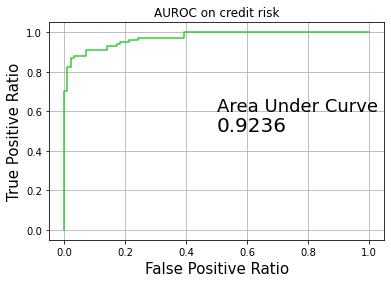

In [69]:
plt.plot(fpr , tpr , color = 'limegreen')
plt.grid()
plt.title('AUROC on credit risk' )
plt.xlabel('False Positive Ratio', size = 15)
plt.ylabel('True Positive Ratio', size = 15)
plt.text( x = .5 , y = .6 , s = "Area Under Curve" , size = 18)
plt.text( x = .5 , y = .5 , s = log_roc_auc , size = 20)
plt.grid

In [70]:
from sklearn.metrics import classification_report , confusion_matrix

print(classification_report(Y_test, X_test_prediction))
print(confusion_matrix( X_test_prediction,Y_test)) 

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        99
           1       0.97      0.88      0.92        98

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197

[[96 12]
 [ 3 86]]


In [71]:
# So here we can see that TPR is high as compared FPR so model is better performed

## Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [73]:
rfc.fit(X_train,Y_train)

RandomForestClassifier()

In [74]:
pred_rfc = rfc.predict(X_test)

In [75]:
tab=confusion_matrix(  pred_rfc,Y_test)
tab

array([[96, 15],
       [ 3, 83]], dtype=int64)

In [76]:
## Accuracy on Test data
test_data_accuracy_rfc = accuracy_score(pred_rfc , Y_test)
test_data_accuracy_rfc

0.9086294416243654

In [77]:
# accuracy on training data
X_train_prediction_rfc =rfc.predict(X_train)
training_data_accuracy_rfc = accuracy_score(X_train_prediction_rfc , Y_train)

In [78]:
training_data_accuracy_rfc

1.0

In [79]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91        99
           1       0.97      0.85      0.90        98

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197



In [80]:
#  here FPR/ Precision is lower so better is the model on Random Forest Algorithm

# Decesion Tree

In [81]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier(class_weight='balanced')

In [82]:
dc.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight='balanced')

In [83]:
pred_dc = dc.predict(X_test)

In [84]:
from sklearn.metrics import confusion_matrix
tab = confusion_matrix(  pred_dc,Y_test )

In [85]:
tab

array([[89, 12],
       [10, 86]], dtype=int64)

In [86]:
 ## Accuracy on Test data
test_data_accuracy_rfc = accuracy_score(pred_dc , Y_test)
test_data_accuracy_rfc

0.8883248730964467

In [87]:
# accuracy on training data
X_train_prediction_dc =dc.predict(X_train)
training_data_accuracy_dc = accuracy_score(X_train_prediction_dc , Y_train)

In [88]:
 training_data_accuracy_dc

1.0

In [89]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, pred_dc))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        99
           1       0.90      0.88      0.89        98

    accuracy                           0.89       197
   macro avg       0.89      0.89      0.89       197
weighted avg       0.89      0.89      0.89       197



In [90]:
# Fpr is high as compared to tpr so model is not working good

# KNN

In [91]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)

In [92]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=7)

In [93]:
pred_knn = knn.predict(X_test)

In [94]:
from sklearn.metrics import confusion_matrix

In [95]:
tab_knn = confusion_matrix(pred_knn , Y_test)
tab_knn

array([[63, 37],
       [36, 61]], dtype=int64)

In [96]:
# accuracy on training data
X_train_prediction_knn = knn.predict(X_train)
training_data_accuracy_knn = accuracy_score(X_train_prediction_knn , Y_train)

In [97]:
training_data_accuracy_knn

0.7229987293519695

In [98]:
 ## Accuracy on Test data
test_data_accuracy_knn = accuracy_score(pred_knn , Y_test)
test_data_accuracy_knn

0.6294416243654822

In [99]:
## here we can see that accuracy of accuracy is low ascomapred to other algorithm so modelis not so good

In [100]:
from sklearn.metrics import classification_report , confusion_matrix

print(classification_report(Y_test, X_test_prediction))  # Logistic REgression model
print(classification_report(Y_test, pred_rfc))           # Random Forest
print(classification_report(Y_test, pred_dc))           # Decesion Tree

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        99
           1       0.97      0.88      0.92        98

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197

              precision    recall  f1-score   support

           0       0.86      0.97      0.91        99
           1       0.97      0.85      0.90        98

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        99
           1       0.90      0.88      0.89        98

    accuracy                           0.89       197
   macro avg       0.89      0.89      0.89       197
weighted avg       0.89      0.89      0.89       197



In [ ]:
## So logistic Regression is best model as compaired of all algorithm